In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
import math
import numpy as np
data = pd.read_csv(r"E:\ml_csv_file\rainfall_1901_2016_pak.csv")

print(data)
# print(data.head)
# # print(data.info)
# # print(data.GPA)
# # print(data.SAT)
#print(data.describe)

      Rainfall   Year      Month
0     40.42580   1901    January
1     12.30220   1901   February
2     25.51190   1901      March
3     14.29420   1901      April
4     38.30460   1901        May
...        ...    ...        ...
1387  60.60610   2016     August
1388  13.76940   2016  September
1389   1.07552   2016    October
1390   2.88480   2016   November
1391   7.82298   2016   December

[1392 rows x 3 columns]


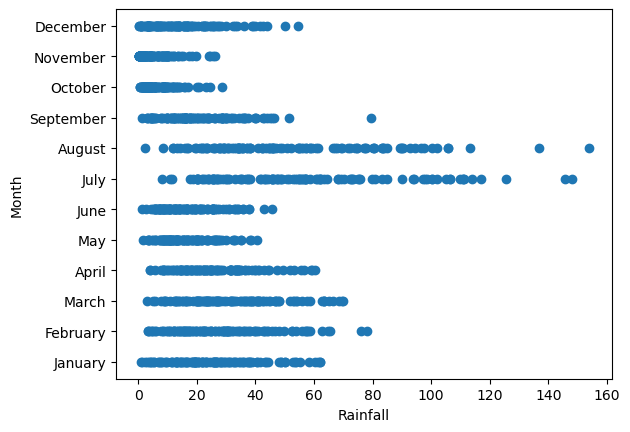

In [78]:
plt.scatter(data.Rainfall,data.Month)
plt.xlabel("Rainfall")
plt.ylabel("Month")
plt.show()

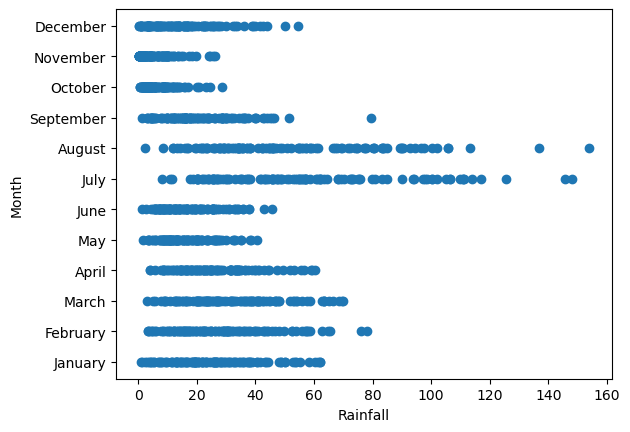

In [79]:
x = data['Rainfall'].values.reshape(-1, 1)
y = data['Month'].values.reshape(-1, 1)

# Convert NumPy arrays to hashable format (tuple)
x_tuple = tuple(x.flatten())
y_tuple = tuple(y.flatten())

plt.scatter(x_tuple, y_tuple)
plt.xlabel('Rainfall')
plt.ylabel('Month')
plt.show()


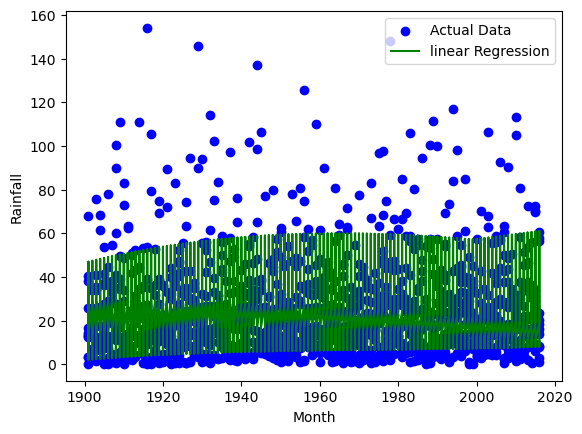

In [80]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Convert 'Month' to numerical representation using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Month'], drop_first=True)

# Extract the numerical representation of 'Month' and 'Rainfall'
x = data_encoded.drop('Rainfall', axis=1).values
y = data_encoded['Rainfall'].values.reshape(-1, 1)

# Apply polynomial regression
polynomial_regression = PolynomialFeatures(degree=3)
x_polynomial_regression = polynomial_regression.fit_transform(x)
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial_regression, y)

# Prediction
y_head2 = linear_regression.predict(x_polynomial_regression)

# Plotting
plt.scatter(x[:, 0], y, color='blue', label='Actual Data')  # Assuming 'Month' is the first column
plt.plot(x[:, 0], y_head2, color='green', label='linear Regression')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.legend()
plt.show()




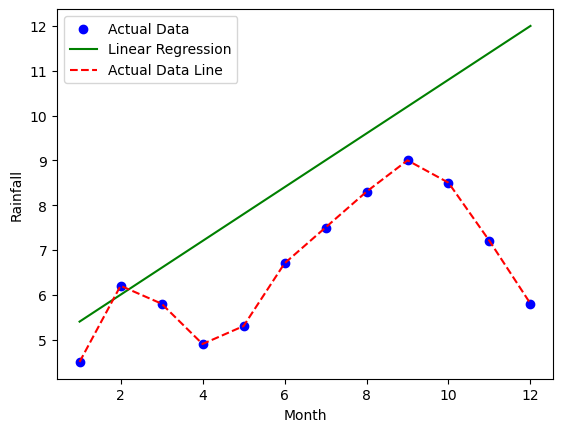

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = np.array([4.5, 6.2, 5.8, 4.9, 5.3, 6.7, 7.5, 8.3, 9.0, 8.5, 7.2, 5.8])

# Define the linear regression model
def linear_regression(x):
  m = 0.6
  b = 4.8
  return m * x + b

# Predict the rainfall using the model
y_head2 = linear_regression(x)

# Plot the actual data and the predicted rainfall
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_head2, color='green', label='Linear Regression')

# Add a line representing the actual data
plt.plot(x, y, color='red', linestyle='--', label='Actual Data Line')

# Label the axes and add a legend
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.legend()

# Show the plot
plt.show()


In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

data = pd.read_csv(r"E:\ml_csv_file\rainfall_1901_2016_pak.csv")

print(data)

      Rainfall   Year      Month
0     40.42580   1901    January
1     12.30220   1901   February
2     25.51190   1901      March
3     14.29420   1901      April
4     38.30460   1901        May
...        ...    ...        ...
1387  60.60610   2016     August
1388  13.76940   2016  September
1389   1.07552   2016    October
1390   2.88480   2016   November
1391   7.82298   2016   December

[1392 rows x 3 columns]


In [74]:
x = data.iloc[:,[0]].values.reshape(-1,1)
y = data.iloc[:,[1]].values.reshape(-1,1)

In [75]:
#%%  decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

print(tree_reg.predict(np.array([5,0]).reshape(-3,1)))

[1945. 1917.]


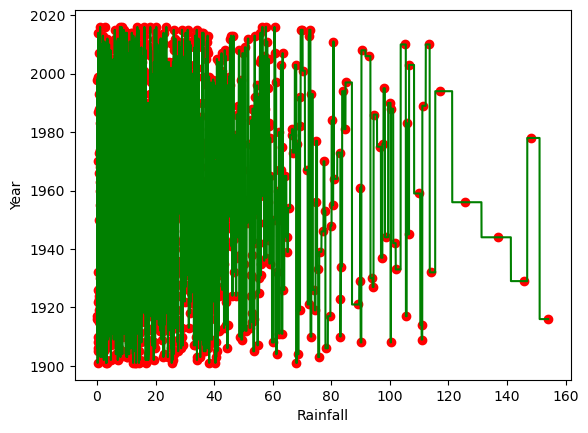

r_square score:  1.0


In [76]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
#print(x)
y_head = tree_reg.predict(x_)
#print(y_head)

# %% visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color = "green")
plt.xlabel("Rainfall")
plt.ylabel("Year")
plt.show()

y_head = tree_reg.predict(x)
#from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))